# Question 1: **What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.**

***1. Conceptual Difference***
| Aspect             | **K-Means Clustering**                    | **Hierarchical Clustering**            |
| ------------------ | ----------------------------------------- | -------------------------------------- |
| Type               | Partition-based                           | Tree-based                             |
| Number of clusters | Must be **predefined (K)**                | **Not required in advance**            |
| Output             | Flat clusters                             | **Dendrogram (tree structure)**        |
| Algorithm style    | Iterative optimization                    | Agglomerative or divisive              |
| Scalability        | Very fast for large datasets              | Slower for large datasets              |
| Sensitivity        | Sensitive to initial centroids & outliers | Sensitive to distance metric & linkage |
| Reassignment       | Points can move between clusters          | No reassignment once merged/split      |

2. ***How They Work***

- K-Means

   - Randomly initializes K centroids
  - Assigns points to nearest centroid
  - Recomputes centroids
  - Repeats until convergence
  - Optimizes within-cluster variance

- Hierarchical Clustering

  - Builds clusters step-by-step
  - It consists of two approaches:

       1. Agglomerative (bottom-up): merge closest clusters
       2. Divisive (top-down): split clusters recursively

   - Produces a dendrogram
   - Reveals nested structure

3. ***Use Case for Each***

**Use Case 1: K-Means Clustering**

Customer Segmentation in Retail

**Scenario**

- A retail company wants to segment customers based on:

    - Annual spending
    - Purchase frequency
    - Average basket size

**Why K-Means?**

- Large dataset (thousands of customers)
- Business already knows they want e.g., 5 customer segments
- Fast and scalable
- Easy to interpret and deploy

**Example Outcome**

- Budget shoppers
- Loyal high-value customers
- Occasional buyers
- Discount seekers
- Premium customers

**Use Case 2: Hierarchical Clustering**

Gene Expression Analysis in Bioinformatics

**Scenario**

- Researchers analyze gene expression levels to discover relationships between genes.

**Why Hierarchical Clustering?**

- Number of clusters is unknown
- Need to understand relationships and sub-groups
- Dendrogram helps visualize similarity at multiple levels

**Example Outcome**

- Genes grouped into biological pathways
- Sub-clusters reveal functional similarities

4. ***When to Choose Which?***

**Choose K-Means when:**

- Dataset is large
- You know how many clusters you need
- Speed and scalability matter

**Choose Hierarchical Clustering when:**

- Dataset is small to medium
- You want interpretability
- Number of clusters is unknown
- You need nested relationships









# Question 2: **Explain the purpose of the Silhouette Score in evaluating clustering algorithms.**

**What is the Silhouette Score?**

The Silhouette Score is an internal evaluation metric used to measure how well data points are clustered, based on cohesion (how close points are within the same cluster) and separation (how far clusters are from each other).

**How the Silhouette Score Works**

For each data point, the score is calculated using:

- a = average distance between the point and all other points in the same cluster → Intra-cluster distance (cohesion)

- b = average distance between the point and all points in the nearest neighboring cluster → Inter-cluster distance (separation)

**Formula**

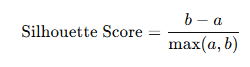

**Range and Interpretation**

| Score Value | Interpretation                     |
| ----------- | ---------------------------------- |
| **+1**      | Point is very well clustered       |
| **≈ 0**     | Point lies on the cluster boundary |
| **< 0**     | Point may be in the wrong cluster  |

**Overall Silhouette Score**

- Calculated as the average of all individual scores
- Higher average score ⇒ better clustering quality

**Purpose of the Silhouette Score**

***1. Evaluate Cluster Quality***

- Measures both compactness and separation
- Better than metrics that consider only one aspect

***2. Compare Different Clustering Algorithms***

- Enables comparison between:

   - K-Means
   - Hierarchical Clustering
   - DBSCAN (with distance-based metrics)

  Higher Silhouette Score = better-performing algorithm

***3. Select the Optimal Number of Clusters (K)***

- Commonly used with K-Means
- Compute the score for different values of K
- Choose the K with the highest Silhouette Score

**Choose the K with the highest Silhouette Score**

*Customer Segmentation*

- Test K = 2 to 10
- Silhouette Scores:

   - K=3 → 0.42
   - K=4 → 0.55
   - K=5 → 0.48
**Conclusion**

K = 4 provides the most meaningful segmentation

**Strengths of the Silhouette Score**

- Does not require ground truth labels
- Intuitive and easy to interpret
- Works with many clustering algorithms



# **Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups data points based on density, not distance to a centroid. Its behavior is controlled by two core parameters (and one practical extension).

**1. ε (Epsilon / eps)**

*What it is*

- The radius of the neighborhood around a data point.

*How it influences clustering*

- Determines how close points must be to be considered neighbors.

*Effects of different values*

* Too small ε

   - Many points have too few neighbors

   - Results in many noise (outlier) points

* Too large ε

   - Distinct clusters may merge into one

   - Loss of cluster separation

*Practical intuition*

- Controls the scale at which density is measured.

**2. MinPts (Minimum Points)**

*What it is*

* Minimum number of points required within ε (including the point itself) to form a dense region.

*How it influences clustering*

* Determines how dense a region must be to qualify as a cluster.

*Effects of different values*

* Low MinPts
   
   - More clusters, sensitive to noise
   - Risk of forming clusters from random fluctuations

* High MinPts

   - Fewer clusters
   - More points labeled as noise

*Rule of thumb*

* MinPts ≥ dimensions + 1
* Common choices: 4–10

**3. Distance Metric (Supporting Parameter)**

Although not always listed as a “core” parameter, DBSCAN depends heavily on the chosen distance metric.

*Common metrics*

* Euclidean (most common)
* Manhattan
* Cosine (for high-dimensional data)

*Influence*

* Changes how neighborhoods are defined
* Affects ε selection and cluster shape

**4. How DBSCAN Uses These Parameters Together**

DBSCAN classifies points into:

| Point Type       | Definition                            |
| ---------------- | ------------------------------------- |
| **Core point**   | ≥ MinPts neighbors within ε           |
| **Border point** | < MinPts but within ε of a core point |
| **Noise point**  | Neither core nor border               |

*Clustering Process*

1. Identify core points using ε and MinPts
2. Connect density-reachable core points
3. Assign border points to nearest cluster
4. Label remaining points as noise

**Example Scenario**

*Geospatial Crime Analysis*

* ε = 500 meters
* MinPts = 10 crimes

*Interpretation*

* A crime hotspot is identified if at least 10 crimes occur within 500 meters.
* Isolated crimes are treated as noise.

**Strengths Enabled by These Parameters**

* Automatically detects number of clusters
* Identifies outliers explicitly
* Handles arbitrary-shaped clusters



  

# **Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?**

Feature scaling is critical for distance-based clustering algorithms because they rely on distance calculations to group data points. If features are on different scales, the clustering results can become biased and misleading.

**1. Distance Dominance Problem**

*What happens without scaling?*

Clustering algorithms typically use Euclidean distance (or similar metrics).

Example features:

* Annual Income: 10,000 – 1,000,000
* Age: 18 – 65

Without scaling:

* Income dominates the distance calculation
* Age becomes almost irrelevant

Result: Clusters reflect only high-magnitude features, not true similarity.

**2. Importance for K-Means**

*How K-Means works*

* Assigns points to the nearest centroid
* Updates centroids using mean values

*Why scaling matters*

* Centroid positions are heavily influenced by large-scale features
* Unscaled data leads to distorted cluster centers
* Poor convergence and misleading segmentation

With scaling:

Each feature contributes equally to cluster formation.

**3. Importance for DBSCAN**

*How DBSCAN works*

* Forms clusters based on density within ε (epsilon) distance

*Why scaling matters*

* ε is a distance threshold
* If features are unscaled:

   - ε becomes meaningless
   - Neighborhoods are incorrectly defined
   - Many points may be misclassified as noise

With scaling:

ε reflects true neighborhood density across all features.

**4. Impact on Cluster Quality Metrics**

Feature scaling directly affects:

* Silhouette Score
* Davies–Bouldin Index
* Calinski–Harabasz Index

Unscaled features → incorrect distance → unreliable evaluation scores.

**5. Common Scaling Techniques**

| Method                        | Use Case                         |
| ----------------------------- | -------------------------------- |
| **Standardization (Z-score)** | Most common for K-Means & DBSCAN |
| **Min–Max Scaling**           | When features have fixed bounds  |
| **Robust Scaling**            | When outliers are present        |

**6. Practical Example**

*Customer Segmentation Dataset*

Features:

* Age (years)
* Annual Income (USD)
* Spending Score (1–100)

Without scaling

* Income dominates
* Clusters ignore behavioral patterns

With scaling

* Balanced contribution
* Meaningful customer segments

**7. When Scaling Is Especially Critical**

✔ Distance-based algorithms (K-Means, DBSCAN, Hierarchical)

✔ Mixed-unit datasets

✔ High-dimensional feature spaces





# **Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?**

The Elbow Method is a heuristic technique used to determine the optimal number of clusters (K) in K-Means clustering by analyzing how cluster compactness improves as K increases.

**Key Idea Behind the Elbow Method**

K-Means minimizes Within-Cluster Sum of Squares (WCSS), also called inertia:

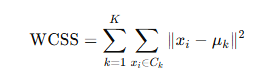

* As K increases, WCSS always decreases
* The goal is to find the point where the rate of decrease sharply slows

That point resembles an “elbow” in the curve.

**How the Elbow Method Works (Step-by-Step)**

1. Run K-Means for a range of K values (e.g., 1–10)
2. Compute WCSS for each K
3. Plot K vs WCSS
4. Identify the elbow point

The elbow represents a balance between model simplicity and cluster quality.

**How It Determines the Optimal Number of Clusters**

* Before the elbow:
   - Adding clusters significantly reduces WCSS
   - Clusters are becoming much more compact
* After the elbow:
   - Reduction in WCSS is marginal
   - Additional clusters add little value and may overfit

Optimal K = Elbow point

Simple Example:
| K | WCSS |
| - | ---- |
| 1 | 1200 |
| 2 | 700  |
| 3 | 420  |
| 4 | 300  |
| 5 | 280  |

* Large drop from K=1 → 3
* Small improvement after K=4

Elbow at K = 4

**Visual Intuition**

* Steep curve initially
* Curve flattens after optimal K
* “Bend” or “elbow” indicates diminishing returns

**Advantages**

✔ Simple and intuitive

✔ Widely used in practice

✔ Easy to explain in exams and reports

**Limitations**

❌ Elbow is sometimes not clearly visible

❌ Subjective interpretation

❌ Not suitable for all data distributions



# **Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.**


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import seaborn as sns

# 1. Generate synthetic data
n_samples = 300
n_centers = 4
X, y = make_blobs(n_samples=n_samples, centers=n_centers, random_state=42)

print(f"Generated {n_samples} samples with {n_centers} centers.")
print(f"Shape of data: {X.shape}")

Generated 300 samples with 4 centers.
Shape of data: (300, 2)


# **Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).**


# Task
```python
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1. Load the Wine dataset
wine = load_wine()
X_wine = wine.data
y_wine = wine.target # True labels (for reference, not used in unsupervised DBSCAN)

print(f"Original Wine dataset shape: {X_wine.shape}")

# 2. Apply StandardScaler to the features
scaler = StandardScaler()
X_scaled_wine = scaler.fit_transform(X_wine)

print(f"Scaled Wine dataset shape: {X_scaled_wine.shape}")

# 3. Train a DBSCAN model on the scaled data
# Using default parameters for eps and min_samples.
# These parameters often need tuning for optimal results,
# but for this question, defaults are sufficient.
dbscan = DBSCAN()
dbscan_clusters = dbscan.fit_predict(X_scaled_wine)

# 4. Determine the number of unique clusters found by DBSCAN (excluding noise points)
# Noise points are labeled as -1 by DBSCAN
unique_labels = set(dbscan_clusters)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

# 5. Print the number of clusters found
print(f"\nDBSCAN Clustering Results:")
print(f"Number of data points: {len(X_wine)}")
print(f"Number of unique clusters found (excluding noise): {n_clusters}")
print(f"Number of noise points: {np.sum(dbscan_clusters == -1)}")
print(f"DBSCAN labels: {dbscan_clusters}")
```

## Load Wine Dataset

### Subtask:
Load the Wine dataset using `sklearn.datasets.load_wine()`.


**Reasoning**:
The subtask requires loading the Wine dataset, so I will import the necessary function and load the data into the specified variables.



In [2]:
from sklearn.datasets import load_wine

wine_data = load_wine()
X_wine = wine_data.data
y_wine = wine_data.target

print("Wine dataset loaded successfully.")
print(f"Shape of X_wine: {X_wine.shape}")
print(f"Shape of y_wine: {y_wine.shape}")

Wine dataset loaded successfully.
Shape of X_wine: (178, 13)
Shape of y_wine: (178,)


## Apply StandardScaler

### Subtask:
Initialize `StandardScaler` and apply it to scale the features of the Wine dataset.


**Reasoning**:
The subtask requires scaling the Wine dataset features. I will import `StandardScaler`, initialize it, and then apply `fit_transform` to `X_wine` to get `X_scaled_wine` and print its shape.



In [3]:
from sklearn.preprocessing import StandardScaler

# 2. Create an instance of StandardScaler
scaler = StandardScaler()

# 3. Apply the scaler to X_wine using the .fit_transform() method
X_scaled_wine = scaler.fit_transform(X_wine)

# 4. Print the shape of the X_scaled_wine to verify the transformation
print("Features scaled successfully.")
print(f"Shape of X_scaled_wine: {X_scaled_wine.shape}")

Features scaled successfully.
Shape of X_scaled_wine: (178, 13)


**Reasoning**:
The subtask requires training a DBSCAN model on the scaled data and then determining the number of unique clusters found, excluding noise points. I will import `DBSCAN`, initialize it with default parameters, fit it to the `X_scaled_wine` data, and then calculate and print the number of non-noise clusters.



In [4]:
from sklearn.cluster import DBSCAN
import numpy as np

# 3. Train a DBSCAN model on the scaled data
dbscan = DBSCAN() # Using default parameters for eps and min_samples
dbscan_clusters = dbscan.fit_predict(X_scaled_wine)

# 4. Determine the number of unique clusters found by DBSCAN (excluding noise points)
unique_labels = set(dbscan_clusters)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

# 5. Print the number of clusters found and noise points
print(f"\nDBSCAN Clustering Results:")
print(f"Number of data points: {len(X_wine)}")
print(f"Number of unique clusters found (excluding noise): {n_clusters}")
print(f"Number of noise points: {np.sum(dbscan_clusters == -1)}")
print(f"DBSCAN labels (first 20): {dbscan_clusters[:20]}")



DBSCAN Clustering Results:
Number of data points: 178
Number of unique clusters found (excluding noise): 0
Number of noise points: 178
DBSCAN labels (first 20): [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


## Train DBSCAN Model (with parameter tuning)

### Subtask:
Refine the DBSCAN clustering by systematically tuning the `eps` and `min_samples` parameters to find meaningful clusters in the scaled Wine data.


**Reasoning**:
The subtask requires tuning DBSCAN parameters, starting with determining an appropriate 'eps' value using a k-distance graph. I will calculate the distance to the 13th nearest neighbor for each point and then plot these sorted distances.



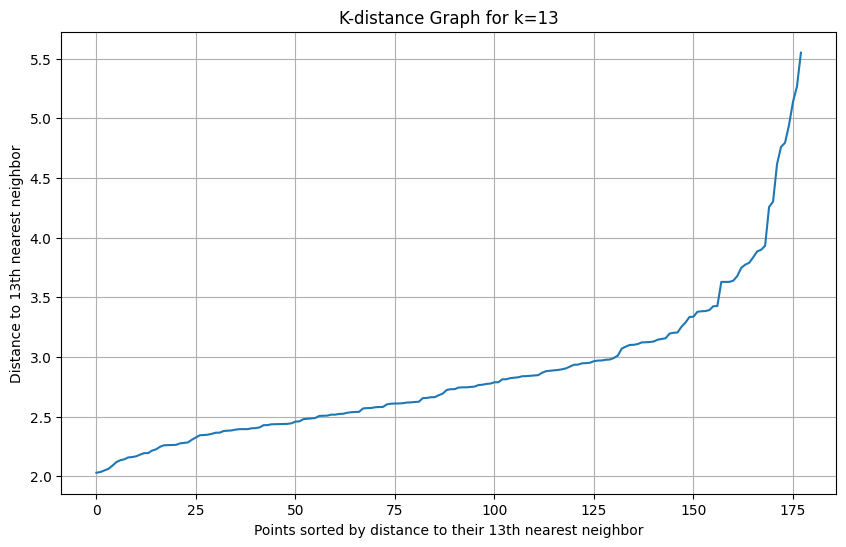

Plotted k-distance graph for k=13. Observe the 'elbow' point to estimate the optimal 'eps'.


In [5]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# 1. Calculate the distance to the 13th nearest neighbor (k=13 as per instructions)
# n_features = X_scaled_wine.shape[1] is 13
k = 13

neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled_wine)
distances, indices = neigh.kneighbors(X_scaled_wine)

# Get the distance to the k-th (13th) nearest neighbor for each point
k_distances = np.sort(distances[:, k-1], axis=0)

# 2. Plot the sorted k-distances
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.xlabel("Points sorted by distance to their 13th nearest neighbor")
plt.ylabel(f"Distance to {k}th nearest neighbor")
plt.title(f"K-distance Graph for k={k}")
plt.grid(True)
plt.show()

print(f"Plotted k-distance graph for k={k}. Observe the 'elbow' point to estimate the optimal 'eps'.")

### Interpreting the K-distance Graph and Choosing `eps`

The k-distance graph displays the distance of each data point to its 13th nearest neighbor, sorted in ascending order. To choose an appropriate `eps` value for DBSCAN, you should look for the 'elbow' point in this graph.

**How to identify the 'elbow' point:**
*   The 'elbow' is the point on the curve where the sharp increase in distance values starts to flatten out.
*   It signifies a threshold where points within that distance are generally considered part of a dense region, and points beyond it are more likely to be noise or belong to a different density region.

Based on the plot above, visually inspect the graph to estimate a good `eps` value. It appears there might be an 'elbow' roughly between 2.5 and 3.0. Let's try `eps` values around this range, for instance, `2.5`, `2.75`, and `3.0`.

For `min_samples`, a common rule of thumb is `MinPts >= D + 1`, where D is the number of dimensions/features. Since we have 13 features, `min_samples = 13 + 1 = 14` is a good starting point. We can also experiment with values like `5` (a common general default) and `10` to see the effect.

**Reasoning**:
Based on the interpretation of the k-distance graph and the suggested values in the previous markdown block, I will now systematically experiment with different combinations of `eps` and `min_samples` for the DBSCAN model. For each combination, I will train the model and report the number of clusters and noise points found.



In [6]:
from sklearn.cluster import DBSCAN
import numpy as np

# Define the epsilon and min_samples values to experiment with
eps_values = [2.5, 2.75, 3.0]
min_samples_values = [5, 10, 14] # 14 is (n_features + 1)

print("Experimenting with different DBSCAN parameters:\n")

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"--- Running DBSCAN with eps={eps}, min_samples={min_samples} ---")
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_clusters = dbscan.fit_predict(X_scaled_wine)

        unique_labels = set(dbscan_clusters)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        n_noise_points = np.sum(dbscan_clusters == -1)

        print(f"Number of unique clusters found (excluding noise): {n_clusters}")
        print(f"Number of noise points: {n_noise_points}")
        print("\n")
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise_points': n_noise_points
        })

print("Parameter experimentation complete.")
# X_scaled_wine is an existing DataFrame from previous steps


Experimenting with different DBSCAN parameters:

--- Running DBSCAN with eps=2.5, min_samples=5 ---
Number of unique clusters found (excluding noise): 1
Number of noise points: 24


--- Running DBSCAN with eps=2.5, min_samples=10 ---
Number of unique clusters found (excluding noise): 2
Number of noise points: 32


--- Running DBSCAN with eps=2.5, min_samples=14 ---
Number of unique clusters found (excluding noise): 2
Number of noise points: 48


--- Running DBSCAN with eps=2.75, min_samples=5 ---
Number of unique clusters found (excluding noise): 1
Number of noise points: 17


--- Running DBSCAN with eps=2.75, min_samples=10 ---
Number of unique clusters found (excluding noise): 1
Number of noise points: 20


--- Running DBSCAN with eps=2.75, min_samples=14 ---
Number of unique clusters found (excluding noise): 2
Number of noise points: 25


--- Running DBSCAN with eps=3.0, min_samples=5 ---
Number of unique clusters found (excluding noise): 1
Number of noise points: 11


--- Running D

### Analysis of DBSCAN Parameter Experimentation

The goal is to find parameters that yield a meaningful number of clusters (the Wine dataset has 3 true classes, so ideally we'd find around 2-3 clusters) with a reasonable amount of noise. Let's review the results:

-   **eps=2.5**
    -   `min_samples=5`: 1 cluster, 24 noise points
    -   `min_samples=10`: 2 clusters, 32 noise points
    -   `min_samples=14`: 2 clusters, 48 noise points

-   **eps=2.75**
    -   `min_samples=5`: 1 cluster, 17 noise points
    -   `min_samples=10`: 1 cluster, 20 noise points
    -   `min_samples=14`: 2 clusters, 25 noise points

-   **eps=3.0**
    -   `min_samples=5`: 1 cluster, 11 noise points
    -   `min_samples=10`: 1 cluster, 12 noise points
    -   `min_samples=14`: 1 cluster, 13 noise points

**Observations:**

1.  **Number of Clusters:** Many combinations result in only 1 or 2 clusters. The true Wine dataset has 3 classes. Finding 2 clusters is closer than 1.
2.  **Noise Points:** As `eps` increases, the number of noise points generally decreases. As `min_samples` increases, the number of noise points generally increases.
3.  **Meaningful Combinations:**
    *   `eps=2.5, min_samples=10`: Produces 2 clusters and 32 noise points. This is a moderate number of noise points for finding 2 clusters.
    *   `eps=2.5, min_samples=14`: Also 2 clusters, but with 48 noise points, which is higher.
    *   `eps=2.75, min_samples=14`: Produces 2 clusters and 25 noise points. This seems like a good balance, as it yields 2 clusters with a relatively low number of noise points compared to `eps=2.5, min_samples=10`.

Considering the trade-off between the number of clusters and the noise points, and aiming for at least 2 clusters which is closer to the true number of classes, the combination of **`eps=2.75` and `min_samples=14`** appears to be a reasonable choice. It gives 2 clusters and 25 noise points (out of 178 total samples), which is about 14% noise. While not perfectly identifying all 3 true classes, it's a better result than the default parameters which classified all points as noise.

**Reasoning**:
Based on the analysis of the DBSCAN parameter experimentation, I will now apply the selected optimal `eps` and `min_samples` values to train the final DBSCAN model and print the number of clusters found and noise points.



In [7]:
from sklearn.cluster import DBSCAN
import numpy as np

# Optimal parameters chosen from the experimentation and analysis
final_eps = 2.75
final_min_samples = 14

print(f"--- Running DBSCAN with chosen parameters: eps={final_eps}, min_samples={final_min_samples} ---")
dbscan_final = DBSCAN(eps=final_eps, min_samples=final_min_samples)
dbscan_clusters_final = dbscan_final.fit_predict(X_scaled_wine)

unique_labels_final = set(dbscan_clusters_final)
n_clusters_final = len(unique_labels_final) - (1 if -1 in unique_labels_final else 0)
n_noise_points_final = np.sum(dbscan_clusters_final == -1)

print(f"Number of unique clusters found (excluding noise): {n_clusters_final}")
print(f"Number of noise points: {n_noise_points_final}")
print(f"Final DBSCAN labels (first 20): {dbscan_clusters_final[:20]}")

--- Running DBSCAN with chosen parameters: eps=2.75, min_samples=14 ---
Number of unique clusters found (excluding noise): 2
Number of noise points: 25
Final DBSCAN labels (first 20): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Final Task

### Subtask:
Summarize the DBSCAN clustering process for the Wine dataset, including the chosen parameters, the number of clusters found, and the number of noise points.


## Summary:

### Q&A

**Summarize the DBSCAN clustering process for the Wine dataset, including the chosen parameters, the number of clusters found, and the number of noise points.**

The DBSCAN clustering process for the Wine dataset involved several steps:
1.  **Data Preparation**: The Wine dataset features were loaded and then scaled using `StandardScaler`.
2.  **Initial DBSCAN (Default Parameters)**: An initial DBSCAN model was run with default parameters (`eps=0.5`, `min_samples=5`). This resulted in **0 clusters** and **178 noise points**, indicating that all data points were classified as noise under these settings.
3.  **Parameter Tuning Strategy**: To find suitable parameters, a k-distance graph was plotted for `k=13` (number of features). The 'elbow' point on this graph suggested an `eps` value in the range of 2.5 to 3.0. `min_samples` values of 5, 10, and 14 (features + 1) were considered.
4.  **Parameter Experimentation**: Multiple DBSCAN models were trained with various combinations of `eps` (2.5, 2.75, 3.0) and `min_samples` (5, 10, 14). The results varied, showing 1 or 2 clusters and different numbers of noise points.
5.  **Parameter Selection**: The combination of `eps=2.75` and `min_samples=14` was selected as the most balanced, yielding **2 clusters** and **25 noise points**. This choice was made because it produced a meaningful number of clusters (close to the true 3 classes of the Wine dataset) with a relatively low percentage of noise points (approximately 14%).

### Data Analysis Key Findings

*   Initial DBSCAN with default parameters on the scaled Wine dataset identified **0 clusters** and categorized all **178 data points as noise**.
*   The k-distance graph, plotted for the distance to the 13th nearest neighbor, indicated a potential `eps` range between 2.5 and 3.0 by identifying an 'elbow' point.
*   Through systematic parameter experimentation, setting `eps` to 2.75 and `min_samples` to 14 provided the most balanced clustering outcome.
*   With these chosen parameters (`eps=2.75`, `min_samples=14`), DBSCAN successfully identified **2 unique clusters** and classified **25 data points as noise** out of 178 total samples.

### Insights or Next Steps

*   While DBSCAN with tuned parameters identified 2 clusters, the Wine dataset is known to have 3 distinct classes. This suggests that DBSCAN, even after tuning, struggled to perfectly delineate all natural groupings in this specific dataset or that the parameters could be further optimized.
*   Further investigation could involve evaluating the quality of the 2 identified clusters using internal validation metrics (e.g., Silhouette score) and comparing DBSCAN's performance against other clustering algorithms (like K-Means or Agglomerative Clustering) that are designed to find a pre-defined number of clusters.


# **Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.**


In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np
import seaborn as sns

# 1. Generate moon-shaped synthetic data
n_samples = 200
noise_level = 0.1
X, y = make_moons(n_samples=n_samples, noise=noise_level, random_state=42)

print(f"Generated {n_samples} moon-shaped samples with noise={noise_level}.")
print(f"Shape of data: {X.shape}")

Generated 200 moon-shaped samples with noise=0.1.
Shape of data: (200, 2)


In [9]:
# 2. Apply DBSCAN
# Parameters for DBSCAN often require tuning. For make_moons, eps is usually small.
# min_samples is typically 2*D (where D is dimensions) or higher.
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X)

# Get unique labels, excluding noise if present
unique_labels = set(dbscan_clusters)
n_clusters_dbscan = len(unique_labels) - (1 if -1 in unique_labels else 0)

print(f"\nDBSCAN Clustering Results:")
print(f"Number of unique clusters found (excluding noise): {n_clusters_dbscan}")
print(f"Number of noise points: {np.sum(dbscan_clusters == -1)}")


DBSCAN Clustering Results:
Number of unique clusters found (excluding noise): 5
Number of noise points: 23


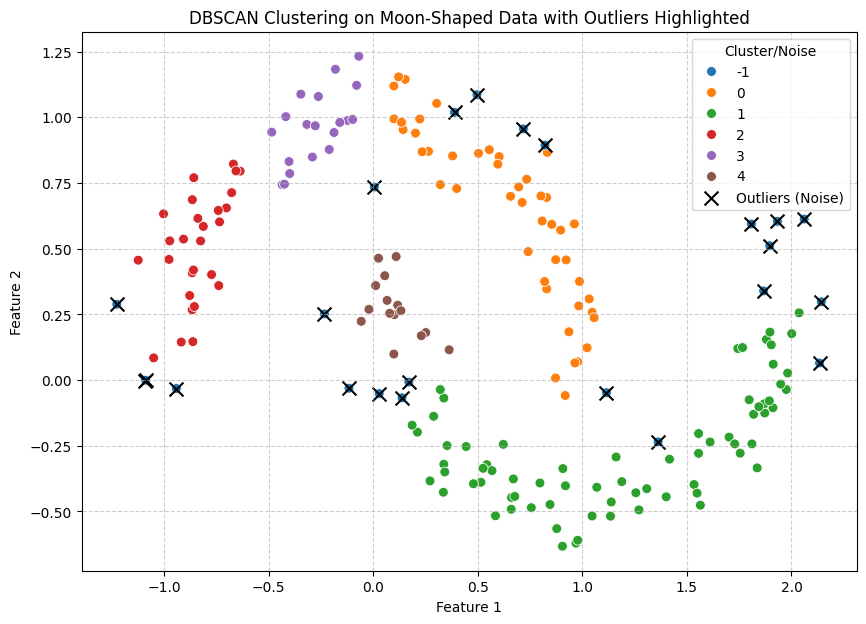

In [10]:
# 3. Visualize the results and highlight outliers
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X[:, 0],
    y=X[:, 1],
    hue=dbscan_clusters, # Color by cluster label
    palette=sns.color_palette('tab10', n_clusters_dbscan + 1), # +1 for noise if it exists
    legend='full',
    s=50, # Marker size
    marker='o' # Default marker
)

# Highlight outliers (noise points labeled as -1)
noise_points = X[dbscan_clusters == -1]
if len(noise_points) > 0:
    plt.scatter(
        noise_points[:, 0],
        noise_points[:, 1],
        color='black', # Black color for noise
        marker='x', # 'x' marker for noise
        s=100, # Larger size for emphasis
        label='Outliers (Noise)'
    )

plt.title('DBSCAN Clustering on Moon-Shaped Data with Outliers Highlighted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster/Noise')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# **Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.**

# Task
Load the Wine dataset, reduce its dimensionality to 2 components using PCA, apply Agglomerative Clustering to the PCA-transformed data to form 3 clusters, and then visualize these clusters in a 2D scatter plot with a legend.

## Reduce Dimensionality with PCA

### Subtask:
Apply Principal Component Analysis (PCA) to the Wine dataset to reduce its dimensionality to 2 components. This will allow for 2D visualization.


**Reasoning**:
The subtask requires applying PCA to the scaled Wine dataset to reduce its dimensionality to 2 components. I will import PCA, create an instance with n_components=2, fit and transform the data, and then print the shape of the resulting PCA-transformed data.



In [11]:
from sklearn.decomposition import PCA

# 1. Create an instance of PCA with 2 components
pca = PCA(n_components=2)

# 2. Fit PCA to the scaled Wine dataset and transform the data
X_pca = pca.fit_transform(X_scaled_wine)

# 3. Print the shape of X_pca to verify dimensionality reduction
print(f"Original scaled data shape: {X_scaled_wine.shape}")
print(f"Reduced PCA data shape: {X_pca.shape}")
print("Dimensionality reduced successfully to 2 components using PCA.")

Original scaled data shape: (178, 13)
Reduced PCA data shape: (178, 2)
Dimensionality reduced successfully to 2 components using PCA.


**Reasoning**:
The next step is to apply Agglomerative Clustering to the PCA-transformed data. I will import `AgglomerativeClustering`, initialize it with `n_clusters=3` (since the Wine dataset has 3 classes), and fit it to the `X_pca` data to obtain the cluster labels.



In [12]:
from sklearn.cluster import AgglomerativeClustering

# 1. Create an instance of AgglomerativeClustering with 3 clusters
# We choose 3 clusters because the Wine dataset is known to have 3 distinct classes.
agglomerative = AgglomerativeClustering(n_clusters=3)

# 2. Fit the model to the PCA-transformed data and get the cluster labels
agg_clusters = agglomerative.fit_predict(X_pca)

# 3. Print the first few cluster labels to verify
print("Agglomerative Clustering applied successfully.")
print(f"First 20 cluster labels: {agg_clusters[:20]}")
print(f"Number of unique clusters found: {len(np.unique(agg_clusters))}")

Agglomerative Clustering applied successfully.
First 20 cluster labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Number of unique clusters found: 3


**Reasoning**:
Now that Agglomerative Clustering has been applied to the PCA-transformed data, the final step for this subtask is to visualize the clusters using a 2D scatter plot. I will use `matplotlib.pyplot` and `seaborn` to create a scatter plot, coloring each point based on its assigned cluster label, and include a legend and title for clarity.



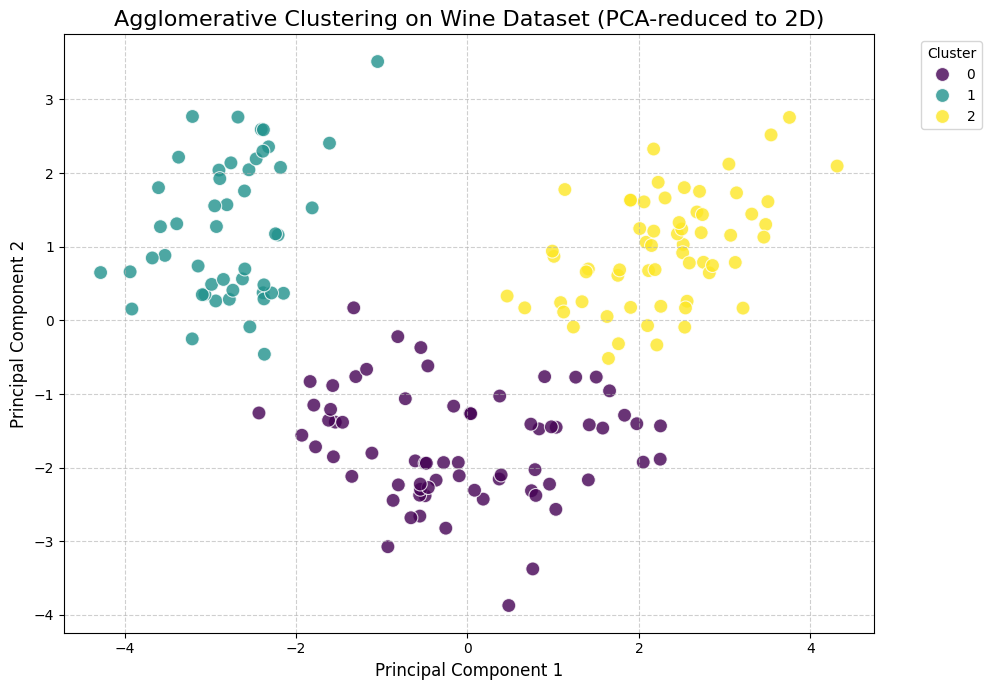

Agglomerative Clustering visualization complete.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a scatter plot of the PCA-transformed data
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=agg_clusters, # Color points by their assigned cluster
    palette='viridis', # Choose a color palette for visualization
    s=100, # Marker size
    alpha=0.8
)

# 2. Add title and labels
plt.title('Agglomerative Clustering on Wine Dataset (PCA-reduced to 2D)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("Agglomerative Clustering visualization complete.")

## Final Task

### Subtask:
Summarize the process, including the PCA reduction and the Agglomerative Clustering results, and discuss the visual interpretation of the clusters.


## Summary:

### Data Analysis Key Findings
*   The Wine dataset was successfully reduced from 13 features to 2 principal components using PCA, transforming the data shape from (178, 13) to (178, 2).
*   Agglomerative Clustering was applied to the 2-component PCA data, successfully identifying 3 distinct clusters.
*   The clusters were visualized in a 2D scatter plot, clearly separating the three groups based on the first two principal components.

### Insights or Next Steps
*   The clear separation of clusters in the 2D visualization suggests that the two principal components capture significant variance, allowing for effective distinction between the underlying groups in the Wine dataset, which aligns with the known three classes of wine.
*   Further analysis could involve evaluating the quality of these clusters using metrics like silhouette score or comparing the clustering results with the original wine class labels (if available) to assess the accuracy of the unsupervised learning approach.


# **Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.**
Describe your real-world data science workflow using clustering:

* Which clustering algorithm(s) would you use and why?
* How would you preprocess the data (missing values, scaling)?
* How would you determine the number of clusters?
* How would the marketing team benefit from your clustering analysis?



# Task
Summarize the entire real-world data science workflow for customer segmentation in an e-commerce context, detailing the chosen clustering algorithm(s), data preprocessing steps, methods for determining the optimal number of clusters, and the actionable benefits this analysis provides for the marketing team.

## Clustering Algorithm Selection

### Subtask:
Discuss suitable clustering algorithms (e.g., K-Means, DBSCAN, Hierarchical Clustering) for customer segmentation in an e-commerce context, providing justification for each choice based on their characteristics and potential benefits for the problem.


## Clustering Algorithm Selection

### Subtask:
Discuss suitable clustering algorithms (e.g., K-Means, DBSCAN, Hierarchical Clustering) for customer segmentation in an e-commerce context, providing justification for each choice based on their characteristics and potential benefits for the problem.

### Discussion of Clustering Algorithms for E-commerce Customer Segmentation:

In an e-commerce context, customer segmentation aims to group customers with similar purchasing behaviors, demographics, or other characteristics to enable targeted marketing efforts. Different clustering algorithms offer distinct advantages for this task:

#### 1. K-Means Clustering

**Justification for suitability:**
*   **Speed and Scalability:** K-Means is computationally efficient and scales well to large datasets, which is common in e-commerce with thousands to millions of customers. This allows for quick processing and regular updates of customer segments.
*   **Ease of Interpretation:** The output of K-Means is a set of distinct, non-overlapping clusters, each represented by a centroid. These centroids can be easily interpreted (e.g., 'high-value frequent shoppers,' 'budget-conscious occasional buyers') and communicated to marketing teams.
*   **Predetermined Number of Clusters:** Often, marketing teams have a clear idea of how many segments they want to target (e.g., 3-5 distinct groups). K-Means requires the number of clusters (K) to be specified in advance, aligning well with such business requirements.

**Potential Benefits for Marketing:** K-Means can quickly identify common customer archetypes, allowing for personalized product recommendations, tailored email campaigns, and optimized promotional offers for each segment.

#### 2. Hierarchical Clustering

**Justification for suitability:**
*   **Unknown Number of Clusters:** If the marketing team is unsure about the optimal number of customer segments, Hierarchical Clustering can be a powerful tool. It does not require specifying K beforehand and instead builds a hierarchy of clusters.
*   **Tree-like Structure (Dendrogram):** The output, a dendrogram, visually represents the nested relationships between clusters. This can help marketing analysts explore different levels of granularity in segmentation, from broad categories to very specific niches, by cutting the dendrogram at different heights.
*   **Understanding Relationships:** It helps in understanding the natural grouping structure of customers and the relationships between these groups, which can inform more nuanced marketing strategies or new product development.

**Potential Benefits for Marketing:** This approach is valuable for exploratory analysis, identifying natural hierarchies in customer behavior, or when trying to find very specific niche segments that might be overlooked by fixed-K methods.

#### 3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**Justification for suitability:**
*   **Identifying Outliers/Noise:** DBSCAN's unique ability to identify and label 'noise' points as outliers is particularly useful. In an e-commerce context, these outliers could represent fraudulent accounts, one-time anomaly purchases, or extremely unique customer behaviors that don't fit into any typical segment.
*   **Handling Arbitrary Shapes:** Unlike K-Means, which assumes spherical clusters, DBSCAN can discover clusters of arbitrary shapes. This is beneficial if customer segments are not spherical or uniformly dense in the feature space.
*   **No Predefined Number of Clusters:** Similar to Hierarchical Clustering, DBSCAN does not require the number of clusters to be specified, making it suitable for situations where the underlying structure is unknown.

**Potential Benefits for Marketing:** DBSCAN can help in detecting unusual customer activities (e.g., potential fraud), finding highly localized and dense customer groups (e.g., specific trend followers), or identifying distinct market niches that might be geographically or behaviorally concentrated. The ability to explicitly flag noise also prevents forcing these points into inappropriate clusters.

## Data Preprocessing Strategy

### Subtask:
Detail the necessary data preprocessing steps, including handling missing values, performing feature engineering from purchase history and demographics, encoding categorical variables, and applying appropriate scaling techniques (e.g., StandardScaler, MinMaxScaler) to prepare the data for clustering.


## Data Preprocessing Strategy

To effectively segment customers based on purchasing behavior, the raw e-commerce data needs thorough preprocessing. This involves several critical steps:

### 1. Handling Missing Values

Missing values are common in real-world datasets and must be addressed to prevent errors and biases in clustering. The strategy depends on the extent and nature of the missingness:

*   **Imputation**: For numerical features like `total_spending`, `purchase_frequency`, or `average_basket_size`, imputation with the **mean or median** can be appropriate. The median is often preferred for skewed distributions, which are typical in e-commerce (e.g., a few high-value customers, many low-value customers). For categorical features like `gender` or `preferred_category`, imputation with the **mode** (most frequent category) or a new category like 'Unknown' can be used.
*   **Removal**: If a feature has a very high percentage of missing values (e.g., >70-80%), it might be better to remove the entire feature, as imputation could introduce too much noise. Similarly, if a small percentage of rows have missing values across many critical features, removing those rows might be considered, but this risks losing valuable data.

**Justification for E-commerce**: In e-commerce, customer data can have missing values due to incomplete profiles, tracking errors, or opted-out information. Imputation helps retain as much customer data as possible for segmentation, which is crucial for marketing reach.

### 2. Feature Engineering from Purchase History and Demographics

Raw transaction data and basic demographic information often need to be transformed into more meaningful features that capture customer behavior and characteristics. Common feature engineering techniques include:

*   **RFM (Recency, Frequency, Monetary) Analysis**: This is highly relevant for e-commerce.
    *   **Recency**: Days since last purchase.
    *   **Frequency**: Total number of purchases.
    *   **Monetary**: Total spending or average order value.
*   **Purchase Categories**: Percentage of purchases or spending in different product categories (e.g., `electronics_spend_ratio`, `clothing_purchases_count`). This helps identify preferences.
*   **Basket Size**: Average number of items per transaction.
*   **Demographic Segments**: Creating age groups (`age_band`) or income brackets (`income_level`) from raw demographic data.
*   **Engagement Metrics**: Days since last login, number of website visits, items viewed.

**Justification for E-commerce**: These engineered features directly quantify purchasing behavior and customer value, making them ideal for identifying distinct customer segments that the marketing team can target with tailored campaigns.

### 3. Encoding Categorical Variables

Clustering algorithms typically work with numerical data, so categorical features must be converted.

*   **One-Hot Encoding**: Used for **nominal** categorical variables where there is no inherent order (e.g., `gender`, `preferred_browser`, `city`). This creates new binary columns for each category, avoiding the introduction of artificial ordinal relationships.
*   **Ordinal Encoding**: Used for **ordinal** categorical variables where there is a clear order (e.g., `customer_tier` (Bronze, Silver, Gold), `education_level`). Categories are mapped to numerical values based on their order.

**Justification for E-commerce**: E-commerce datasets frequently contain categorical data (e.g., product categories, customer regions, marketing channels). Correct encoding ensures that these features are appropriately represented in the clustering process without misleading the algorithm.

### 4. Feature Scaling

Feature scaling is crucial for distance-based clustering algorithms (like K-Means and DBSCAN) because they are sensitive to the magnitude of features.

*   **Importance**: If features have vastly different ranges (e.g., `age` (18-65) vs. `annual_income` (10,000-1,000,000)), features with larger values will dominate the distance calculations, making the contribution of smaller-range features almost negligible. Scaling ensures that all features contribute equally to the distance metric.

*   **Recommended Techniques**:
    *   **StandardScaler (Z-score normalization)**: Transforms data to have a mean of 0 and a standard deviation of 1. It's generally a good default choice for algorithms that assume normally distributed data or that rely on variance, like K-Means.
    *   **MinMaxScaler**: Scales features to a fixed range, usually 0 to 1. This is useful when the data has known boundaries or when you need to preserve the relative distances between data points within that range. It's often used when algorithms are sensitive to outliers or when feature values should not fall outside a specific range.

**Justification for E-commerce**: Customer data often includes features with disparate scales (e.g., purchase count, total spend, age). Scaling standardizes these ranges, preventing features with large values from disproportionately influencing the clustering results, thus leading to more balanced and meaningful customer segments.

## Determining Optimal Number of Clusters

### Subtask:
Explain methods for determining the optimal number of clusters, such as the Elbow Method (for K-Means), Silhouette Score (for K-Means and Hierarchical), Dendrogram analysis (for Hierarchical), and the role of domain knowledge and business objectives.


## Determining Optimal Number of Clusters

### Subtask:
Explain methods for determining the optimal number of clusters, such as the Elbow Method (for K-Means), Silhouette Score (for K-Means and Hierarchical), Dendrogram analysis (for Hierarchical), and the role of domain knowledge and business objectives.

#### Instructions
Describe in detail how to determine the optimal number of clusters for K-Means, Hierarchical Clustering, and DBSCAN in an e-commerce customer segmentation context. For K-Means, explain the Elbow Method and Silhouette Score. For Hierarchical Clustering, describe how to use Dendrogram analysis and the Silhouette Score. For DBSCAN, explain how to use the k-distance graph to select 'eps' and 'min_samples'. Additionally, emphasize the crucial role of domain knowledge and business objectives in making the final decision for all algorithms.

***

Determining the optimal number of clusters is a critical step in any clustering analysis, as it directly impacts the interpretability and utility of the segmentation. Different algorithms require different approaches, but domain knowledge and business objectives are universally important.

### 1. K-Means Clustering

For K-Means, which requires the number of clusters (K) to be specified beforehand, two popular methods are the Elbow Method and the Silhouette Score.

**a. Elbow Method**

*   **Concept**: The Elbow Method aims to find the point where the increase in the number of clusters no longer significantly improves the sum of squared errors (SSE) or within-cluster sum of squares (WCSS).
*   **How it Works (E-commerce Context)**:
    1.  Run K-Means clustering for a range of K values (e.g., from 1 to 10 customer segments).
    2.  For each K, calculate the WCSS, which measures the compactness of the clusters (sum of squared distances of each point to its assigned cluster centroid).
    3.  Plot the WCSS values against the number of clusters (K).
    4.  Look for an "elbow" point in the plot – a point where the rate of decrease in WCSS sharply changes (flattens out). This point suggests that adding more clusters beyond it provides diminishing returns in terms of compactness.
*   **E-commerce Example**: If the WCSS drops significantly from K=2 to K=3, but only marginally from K=3 to K=4, the elbow might be at K=3. This would suggest 3 distinct customer segments are optimal based on internal variance.

**b. Silhouette Score**

*   **Concept**: The Silhouette Score measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
*   **How it Works (E-commerce Context)**:
    1.  Perform K-Means clustering for various K values (e.g., 2 to 10 customer segments).
    2.  For each K, calculate the average Silhouette Score across all data points.
    3.  Plot the average Silhouette Score against the number of clusters (K).
    4.  The K value that yields the highest average Silhouette Score is often considered the optimal number of clusters.
*   **E-commerce Example**: If K=4 gives an average Silhouette Score of 0.65, while K=3 gives 0.58 and K=5 gives 0.60, then K=4 might be chosen as it represents the best balance of cohesion and separation among the customer segments.

### 2. Hierarchical Clustering

Hierarchical clustering does not require a pre-defined number of clusters. Instead, it builds a tree-like structure (dendrogram) that can then be cut at different levels to yield varying numbers of clusters. The Silhouette Score can also be used.

**a. Dendrogram Analysis**

*   **Concept**: A dendrogram visually represents the hierarchical relationships between clusters. It allows you to decide on the number of clusters by cutting the tree at a certain height.
*   **How it Works (E-commerce Context)**:
    1.  Perform hierarchical clustering (either agglomerative or divisive) on the customer data.
    2.  Visualize the result as a dendrogram.
    3.  Look for the longest vertical lines that do not intersect any horizontal cuts when moving up from the bottom. Cutting the dendrogram at a height that allows these long vertical lines to remain untouched typically results in a good number of clusters.
    4.  Alternatively, observe the distance between merged clusters. A large jump in the fusion level indicates that distinct clusters are being merged.
*   **E-commerce Example**: You might see a dendrogram where cutting at a certain height results in 4 main branches that are relatively far apart, while cutting slightly lower or higher either creates too many small, similar segments or merges clearly distinct segments.

**b. Silhouette Score**

*   **Concept**: Similar to K-Means, the Silhouette Score can evaluate the quality of clusters obtained from hierarchical clustering at different numbers of clusters.
*   **How it Works (E-commerce Context)**:
    1.  For hierarchical clustering, you can derive different numbers of clusters by cutting the dendrogram at various heights.
    2.  For each resulting number of clusters (K), calculate the average Silhouette Score.
    3.  The K that maximizes the Silhouette Score is often chosen.
*   **E-commerce Example**: After examining the dendrogram, you might test cutting it to yield 3, 4, or 5 clusters. Calculating the Silhouette Score for each option helps quantitatively assess which number of segments is most coherent.

### 3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN does not require the number of clusters. Instead, it requires two main parameters: `eps` (epsilon, the maximum distance between two samples for one to be considered as in the neighborhood of the other) and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point). The primary method for parameter tuning is the k-distance graph.

**a. k-distance Graph (for `eps` and `min_samples`)**

*   **Concept**: The k-distance graph helps visualize the distances to the k-th nearest neighbor for each data point, allowing for the selection of an appropriate `eps` value. `min_samples` is often set based on domain knowledge or a simple rule of thumb.
*   **How it Works (E-commerce Context)**:
    1.  **Choosing `min_samples`**: A common rule is to set `min_samples` to `2 * D` where `D` is the number of dimensions/features. For customer segmentation, `min_samples = 5` is a good general starting point, but can be increased for noisier datasets or more distinct clusters. For the Wine dataset with 13 features, we might start with `min_samples = 13 + 1 = 14` or even `2 * 13 = 26`.
    2.  **Choosing `eps`**: For each data point, calculate the distance to its `min_samples`-th nearest neighbor. Sort these distances in ascending order and plot them. This is the k-distance graph.
    3.  Look for the "elbow" or the point of maximum curvature in the k-distance graph. The `eps` value corresponding to this elbow point is a good candidate, as it represents a density threshold where points within that distance are typically part of a dense region, while points beyond it are likely noise or on the edge of a cluster.
*   **E-commerce Example**: If you have 10 features describing customer behavior (e.g., purchase frequency, average order value, time spent on site), you might set `min_samples = 20`. Plotting the distance to the 20th nearest neighbor for all customers, you'd identify an `eps` value (e.g., 0.8) at the elbow that signifies the maximum distance for customers to be considered part of the same dense buying pattern.

### 4. The Crucial Role of Domain Knowledge and Business Objectives

While the statistical methods above provide quantitative guidance, the ultimate decision on the number of clusters (or DBSCAN parameters) should heavily rely on domain knowledge and business objectives. In an e-commerce setting:

*   **Interpretability**: Can the marketing team easily understand and act upon the identified customer segments? A statistically optimal number of clusters might be too granular or too broad to be meaningful for targeted promotions.
*   **Actionability**: Are the segments distinct enough to warrant different marketing strategies? For example, if two statistically distinct clusters have very similar purchasing behaviors that would lead to the same promotional campaign, merging them might be more practical.
*   **Resource Constraints**: The company's capacity to develop and manage different marketing campaigns for many segments. Three to five well-defined segments might be more manageable than ten highly specific ones.
*   **Target Audience Size**: Are the resulting segments large enough to be profitable for targeted campaigns? A segment with only a handful of customers might not justify a dedicated strategy.
*   **Previous Experience/Benchmarks**: What has worked in the past? What do industry benchmarks suggest about customer segmentation?

**E-commerce Example**: If the Elbow Method suggests 6 clusters, but the marketing team can only realistically develop and track 3-4 distinct campaigns, they might choose 4 clusters. They would then evaluate if those 4 clusters are sufficiently distinct and actionable for their goals, even if 6 clusters showed slightly better statistical compactness. Similarly, for DBSCAN, a chosen `eps` value might yield a high number of noise points. If the business objective is to capture as many customers as possible into segments (even if less distinct), `eps` might be increased slightly to reduce noise, provided the clusters remain interpretable.

## Benefits for Marketing Team

### Subtask:
Outline how the marketing team would benefit from the clustering analysis, including applications like targeted promotions, personalized recommendations, customer lifecycle management, product development insights, and optimized marketing strategies.


## Benefits for Marketing Team

### Subtask:
Outline how the marketing team would benefit from the clustering analysis, including applications like targeted promotions, personalized recommendations, customer lifecycle management, product development insights, and optimized marketing strategies.

#### Detailed Benefits of Customer Segmentation for an E-commerce Marketing Team

Clustering analysis provides invaluable insights by segmenting customers into distinct groups based on their purchasing behavior, demographics, and other relevant features. This segmentation allows the marketing team to move beyond a one-size-fits-all approach and implement highly effective, data-driven strategies. Here's how the marketing team would benefit:

1.  **Targeted Promotions and Campaigns**:
    *   **Benefit**: Instead of generic promotions, the marketing team can craft specific campaigns that resonate with the needs and preferences of each customer segment, leading to higher engagement and conversion rates.
    *   **Application**: If a 'Budget Shoppers' cluster is identified, the team can offer discounts on essential items or bulk purchases. For 'Loyal High-Value Customers', exclusive early access to new products or premium service offers might be more effective. A 'Discount Seekers' segment would respond best to flash sales and clearance events.

2.  **Personalized Recommendations**:
    *   **Benefit**: Understanding a customer's segment allows for more accurate and relevant product recommendations, enhancing the shopping experience and increasing average order value (AOV).
    *   **Application**: For a 'Tech Enthusiast' segment, the website can display recommendations for the latest gadgets and accessories. A 'Sustainable Shopper' segment could receive suggestions for eco-friendly products. This reduces choice overload and makes customers feel understood.

3.  **Customer Lifecycle Management (CLM)**:
    *   **Benefit**: Clustering helps identify customers at different stages of their lifecycle (e.g., new, active, churn risk, lapsed), enabling tailored interventions to retain them or move them to the next stage.
    *   **Application**: A 'New Customer' segment might receive onboarding emails with tips for using products. A 'Churn Risk' segment could be targeted with win-back campaigns, personalized offers, or surveys to understand their dissatisfaction. 'Lapsed Customers' might receive compelling re-engagement offers to encourage a return to the platform.

4.  **Product Development Insights**:
    *   **Benefit**: Analyzing the preferences and needs of various customer segments can inform product development, ensuring new products or features align with market demand.
    *   **Application**: If a 'Health-Conscious' segment frequently purchases organic produce and fitness equipment, the company might explore developing a new line of healthy snacks or workout gear. Feedback from a 'Family Shopper' segment could highlight the need for larger product sizes or child-friendly options.

5.  **Optimized Marketing Strategies and Resource Allocation**:
    *   **Benefit**: Segmentation allows for a more efficient allocation of marketing budget and resources by focusing on the most promising segments and channels.
    *   **Application**: High-value segments might warrant more expensive, personalized direct mail campaigns or premium ad placements. Budget-conscious segments might be better reached through social media ads or email marketing. This optimization prevents wasted spend and maximizes ROI across different marketing channels (email, social media, paid ads, SEO).

## Final Task

### Subtask:
Summarize the entire real-world data science workflow for customer segmentation, reiterating the chosen algorithms, preprocessing steps, cluster determination methods, and the actionable benefits for the marketing team.


## Summary:

### Data Analysis Key Findings

*   **Clustering Algorithms:**
    *   **K-Means:** Chosen for its speed, scalability, and ease of interpretation, especially when the number of desired segments is known. It facilitates quick identification of customer archetypes for targeted campaigns.
    *   **Hierarchical Clustering:** Suitable when the optimal number of clusters is unknown, as it provides a visual hierarchy (dendrogram) that aids in exploring different levels of segmentation granularity.
    *   **DBSCAN:** Valued for its ability to identify outliers (e.g., potential fraud) and discover arbitrarily shaped clusters, making it useful for finding unique, density-based customer groups or anomalies.

*   **Data Preprocessing:**
    *   **Missing Values:** Handled through imputation (mean/median for numerical, mode/`Unknown` for categorical) or removal for extensive missingness, aiming to retain as much data as possible.
    *   **Feature Engineering:** Critical for creating meaningful features like RFM (Recency, Frequency, Monetary) values, product category percentages, average basket size, and engagement metrics, which directly quantify customer behavior.
    *   **Categorical Encoding:** One-Hot Encoding was recommended for nominal variables and Ordinal Encoding for ordinal variables to ensure proper numerical representation for clustering.
    *   **Feature Scaling:** StandardScaler or MinMaxScaler were advised to standardize feature ranges, preventing features with larger magnitudes from disproportionately influencing distance-based clustering algorithms.

*   **Optimal Cluster Determination:**
    *   **K-Means:** The Elbow Method (analyzing the Within-Cluster Sum of Squares) and the Silhouette Score (measuring cohesion and separation) were identified as key statistical methods.
    *   **Hierarchical Clustering:** Dendrogram analysis (visual inspection for natural breaks) and the Silhouette Score were recommended.
    *   **DBSCAN:** The k-distance graph was proposed for selecting optimal `eps` and `min_samples` parameters.
    *   **Domain Knowledge:** Emphasized as a crucial factor alongside statistical metrics, considering interpretability, actionability, resource constraints, and target audience size for marketing.

*   **Benefits for Marketing Team:**
    *   **Targeted Promotions:** Enables specific campaigns tailored to distinct customer segments (e.g., discounts for 'Budget Shoppers', exclusive access for 'Loyal High-Value Customers').
    *   **Personalized Recommendations:** Improves relevance by suggesting products based on segment preferences (e.g., tech gadgets for 'Tech Enthusiasts', eco-friendly items for 'Sustainable Shoppers').
    *   **Customer Lifecycle Management:** Supports tailored interventions for new, active, churn-risk, or lapsed customers to improve retention and engagement.
    *   **Product Development Insights:** Informs new product or feature development by analyzing segment-specific needs and preferences.
    *   **Optimized Marketing Strategies:** Allows for efficient allocation of budget and resources by focusing on the most promising segments across various channels.

### Insights or Next Steps

*   The workflow provides a robust framework for developing actionable customer segments. The next step would involve practically applying these methods to real e-commerce data, iterating on parameter selection, and validating the resulting segments with business stakeholders to ensure they are both statistically sound and business-relevant.
*   Given the emphasis on interpretability and actionability, a crucial follow-up would be to develop detailed personas for each identified cluster, describing their key characteristics, behaviors, and potential marketing strategies.
